# Python en TP de Physique-Chimie  <a id="toc"></a>

## Table des matières

Le but de ce notebook est de vous rappeler toutes les possibilités intéressantes que vous offre Python en TP de Physique-Chimie.

### Travailler avec des données issues de mesures
* [1. Importer des données depuis un tableur](#1.-Importer-des-données-depuis-un-tableur)
* [2.  Tracer une courbe avec les incertitudes](#2.-Tracer-une-courbe-avec-les-incertitudes)
* [3. Réaliser une modélisation via Python](#3.-Réaliser-une-modélisation-via-Python)
* [5. Evaluer l'incertitude-type sur un paramètre inconnu avec Monte-Carlo](#5.-Evaluer-l'incertitude-type-sur-un-paramètre-inconnu-avec-Monte-Carlo)
* A venir : tracer le spectre d'un signal

### Propager des incertitudes
* [4. Propager les incertitudes avec Monte-Carlo](#4.-Propager-les-incertitudes-avec-Monte-Carlo)

### Réaliser aisément de calculs mathématiques utiles
* A venir : Rechercher le zéro d'une fonction
* [7. Résoudre une équation différentielle](#7.-Résoudre-une-équation-différentielle)



## 1. Importer des données depuis un tableur 
[Retour à la table des matières](#toc)


Vous avez réalisé un jeu de mesures sur un tableur et avez obtenu un fichier type ".xls" ou ".xlsx" à l'aide d'Excel ou Libre Office. 

**Comment l'importer rapidement sur Python ?**


Nous allons pour cela utiliser les modules :
*   ```pandas``` et ```xlrd```pour l'import des données depuis le tableur
*  ```matplotlib.pyplot``` pour les tracés
* ```numpy```pour le traitement des tableaux







In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

Dans un premier temps, on récupère les données qui sont dans le tableur. Une bonne pratique est que chaque grandeur corresponde à une colonne du tableur, et que la première ligne corresponde au nom de la grandeur et à son unité. Par exemple, dans notre fichier ```determinationg.xls```, les trois premières lignes sont :

 | $$\Delta t  \mbox{  (s)  }$$ |  $$u(\Delta t)  \mbox{  (s)  }$$  | $$h  \mbox{  (m)  }$$ | $$u(h)  \mbox{  (m)  }$$ |
 | ---------------|------------------------|-----------------|--------------- |
 |0,25|0,05|0,5|0,02|
 |0,42|0,05|0,75|0,02|


On va importer les données du tableur dans Python sous la forme d'un ```DataFrame```, appelé ```mesdonnees``` ci-dessous, à l'aide de la fonction ```read_excel```:


In [32]:
mesdonnees = pd.read_excel("determinationg.xls")
# si le chemin relatif ne fonctionne pas, vous pouvez indiquer le chemin absolu
# avec des // comme "C://Users//etc//monfichier.xlsx

Il ne reste plus désormais qu'à récupérer chaque colonne du tableur sous forme d'un tableau ```numpy``` à l'aide de la méthode ```values``` suivante :

In [33]:
deltat=mesdonnees.values[:,0] 
# les : indiquent que l'on prend toutes les lignes, 
# le deuxième argument indique la colonne, la première étant repérée par 0
u_deltat=mesdonnees.values[:,1]
h=mesdonnees.values[:,2]
u_h=mesdonnees.values[:,3]

On peut vérifier que l'on a bien récupéré ce que l'on voulait :

In [34]:
deltat

array([0.25, 0.42, 0.5 , 0.53, 0.53, 0.58, 0.72, 0.6 , 0.8 , 0.7 , 0.7 ])

In [7]:
u_deltat

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [8]:
h

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

In [9]:
u_h

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

## 2. Tracer une courbe avec les incertitudes
[Retour à la table des matières](#toc)

On s'intéresse à la durée d'une chute libre en fonction de la hauteur du lâcher. On a réalisé des expériences et on dispose de 4 tableaux ```numpy``` depuis un tableur :


*   ```h``` les hauteurs de lâché en m
*  ```u_h``` les incertitudes type associées en m
* ```deltat``` les durées de chute en s
* ``` u_deltat``` les incertitudes type associées en s

**Comment tracer de manière élégante $\Delta t(h)$ en faisant apparaître les incertitudes type ?**

Nous allons utiliser pour cela le module ```matplotlib.pyplot```.




In [35]:
import matplotlib.pyplot as plt

plt.figure() #créeons une nouvelle figure
plt.errorbar(h,deltat,xerr=u_h,yerr=u_deltat,fmt='.') #les incertitudes type sont placées dans les arguments xerr et yerr
# fmt='.' permet de ne pas relier les points (chaque mesure est un point + barre d'incertitude)
plt.grid(which='both') #on ajoute des grilles verticales et horizontales
plt.xlabel("Hauteur de lâcher (m)") #on nomme l'axe horizontal
plt.ylabel("Temps de chute (s)") #on nomme l'axe vertical
plt.title("Chute libre : durée en fonction de la hauteur") # titre (optionnel)
plt.show()

<a id="modelisation"></a>
## 3. Réaliser une modélisation via Python  

[Retour à la table des matières](#toc)

On s'intéresse à la durée d'une chute libre en fonction de la hauteur du lâcher. On a réalisé des expériences et on dispose de 4 tableaux ```numpy``` depuis un tableur :


*   ```h``` les hauteurs de lâché en m
*  ```u_h``` les incertitudes type associées en m
* ```deltat``` les durées de chute en s
*``` u_deltat``` les incertitudes type associées en s

Dans la partie précédente, on a fait le tracé de $\Delta t$ en fonction de h. On sait que l'expression théorique associée est : $$\Delta t = \sqrt{\frac{2h}{g}}$$ 
où $g$ est le champ de pesanteur.

On va demander à Python de faire de trouver la courbe dont l'équation est la précédente, et qui passe au mieux par les points de mesure. Il en déduira alors la valeur de $g$.

Voici la démarche générale :

Mettons la en application sur notre exemple :

In [36]:
from scipy.optimize import curve_fit # c'est la fonction qui réalise l'ajustement
from math import sqrt

#tout d'abord on définit la fonction à modéliser

def f(x,g):
    return np.sqrt(2*x/g)

x=h
y=deltat

p_estimation,p_err=curve_fit(f, x, y)  #p_estimation est la liste des paramètres estimés 
p_type=np.sqrt(np.diag(p_err)) #p_type est la liste des incertitudes type sur l'estimation des paramètres 

Vérifions la valeur de g, ainsi que le tracé de la courbe modèle :

In [37]:
g=p_estimation[0]
u_g=p_type[0]

#le tracé de nos mesures (cf chapitre précédent)
plt.figure()
plt.errorbar(h,deltat,xerr=u_h,yerr=u_deltat,fmt='.') 
plt.grid(which='both') #on ajoute des grilles verticales et horizontales
plt.xlabel("Hauteur de lâché (m)") #on nomme l'axe horizontal
plt.ylabel("Temps de chute (s)") #on nomme l'axe vertical
plt.title("Chute libre : durée en fonction de la hauteur") # titre (optionnel)

#le tracé de la modélisation
plt.plot(h,f(h,g))
plt.text(0.5,0.8,"g = "+str(g)[0:4]+" m/s²")
plt.text(0.5,0.75,"u(g) = "+str(u_g)[0:3]+" m/s²")

plt.show()

Avant d'accepter les valeurs déterminées par la modélisation on vérifie :
* que les points de mesure sont aléatoirement répartis autour de la courbe de modélisation : ok
* que la courbe est toujours "à proximité" des points (pas plus de 2 écarts-types) : ok, même si tout juste

Dans ce cas, on peut faire confiance au résultat :

$$g=10.0 m.s^{-2}  ;  u(g)=0.6 m.s^{-2}$$

(On ne garde qu'un seul chiffre significatif pour cette méthode de détermination de l'incertitude-type. Il faudrait une méthode de Monte Carlo pour en avoir deux, [présentée un peu plus loin](#mc2)).


## 4. Propager les incertitudes avec Monte-Carlo
[Retour à la table des matières](#toc)

On dispose :
* d'une grandeur $x$ dont la valeur mesurée est $x_m$ associée à son incertitude-type $u(x)$ 
* d'une grandeur $y$ dont la valeur mesurée est $y_m$ associée à son incertitude-type $u(y)$.

**On veut calculer une grandeur $z=f(x,y)$ et estimer l'incertitude-type sur cette grandeur par un algorithme de Monte-Carlo**.

La démarche va se faire en trois temps :
1. On va générer aléatoirement des tableaux de valeurs de $x$ et $y$, de distribution uniforme, et cohérentes avec les valeurs des incertitudes-type (c'est à dire que, pour $x$, les valeurs sont uniformément réparties dans l'intervalle $\left[x-\sqrt{3}\times u(x) ; x+\sqrt{3}\times u(x)\right]$). Ces listes sont appelées ```x``` et ```y``` dans la suite.
2. Pour chaque couple ```x[i],y[i]```, on calcule la valeur ```z[i]=f(x[i],y[i])```
3. L'incertitude-type sur $z$ est l'écart-type du tableau de valeurs de $z$ qui vient d'être calculé.


In [38]:
import random as rd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

def uniforme(m,u,N): # va renvoyer un tableau de N nombres aléatoire correspondant à une distribution uniforme 
# centrée sur m et d'incertitude-type u
    x=[]
    a=m-sqrt(3)*u
    b=m+sqrt(3)*u
    for i in range(N):
        x.append(rd.uniform(a,b)) # la fonction rd.uniform renvoie un nombre aléatoire entre a et b (densité uniforme)
    return np.array(x)

## génération des tableaux x et y

xm= 5.3 # on rentre ici les données issues de l'expérience (grandeur mesurée et incertitude-type)
u_x=0.7

ym= 2.1
u_y=0.4

x=uniforme(xm,u_x,10000)
y=uniforme(ym,u_y,10000)

## définition de la fonction f

def f(x,y):
    return 3*x**2*y

## calcul de la liste des z

z=f(x,y)

## tracé des histogrammes et détermination de l'incertitude type sur z

plt.figure()

plt.subplot(311)
plt.hist(x,bins=100)
plt.title("Histogramme de x")

plt.subplot(312)
plt.hist(y,bins=100)
plt.title("Histogramme de y")

plt.subplot(313)
plt.hist(z,bins=100)
plt.title("Histogramme de z")

zm=np.mean(z)
um=np.std(z)

plt.text(250,150, "zm = "+str(zm)[0:3])
plt.text(250,100, "u(z) ="+str(um)[0:3])

plt.show()

<a id=mc2></a>
## 5. Evaluer l'incertitude-type sur un paramètre inconnu avec Monte-Carlo
[Retour à la table des matières](#toc)

A l'issue d'une modélisation/ajustement d'une courbe avec ```curve_fit```, on peut obtenir la valeur d'un paramètre inconnu ($g$ dans l'exemple plus haut, [à relire absolument avant](#modelisation), associé à une incertitude-type $u(g)$. Cependant, nous ne savons pas comment est déterminée cette incertitude-type et on aimerait la déterminer nous-même pas un algorithme de type Monte-Carlo.

**Comment estimer  l’incertitude-type  sur  les  paramètres  d’une  fonction $f$  telle que $y=f(x)$ où $y$ et $x$ sont des grandeurs mesurées ?** 

On dispose : 
* d’un tableau ```lx``` des valeurs de $x$ mesurées, de longueur ```n```
* d’un tableau ```lux``` des valeurs de $u(x)$ mesurées, de longueur ```n```
* d’un tableau ```ly``` des valeurs de $y$ mesurées, de longueur ```n```
* d’un tableau ```lux``` des valeurs de $u(y)$ mesurées, de longueur ```n```

L'algorithe consiste en :

**Faire $N$ fois :**
* 1) Génération des tableaux simulés ```lx_simu``` et ```ly_simu``` avec une distribution aléatoire :
$$\forall i \mbox{ lx_simu[i] est une valeur aléatoire tirée uniformément dans }$$
$$\left[lx[i]-\sqrt{3}\times lux[i];lx[i]+\sqrt{3}\times lux[i]\right]$$ 
On fait de même pour le tableau des $y$.

* 2) Estimation des paramètres inconnus à l'aide de ```curve_fit``` à partir de ```lx_simu``` et ```ly_simu```. C'est la procédure classique présentée dans le paragraphe "Réaliser une modélisation sous Python".

* 3) Stockage des paramètres estimés dans une liste qui grandit à chaque itération.

**Après les $N$ étapes :**  Observer l’histogramme du(des)  paramètre(s) estimé(s) et calculer l’écart-type associé qui donne l’incertitude type sur le paramètre. 


In [16]:
## on reprend la détermination de g commencée plus haut

# on commence par ré-importer les données

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit # c'est la fonction qui réalise l'ajustement
from math import sqrt
import random as rd

mesdonnees = pd.read_excel("determinationg.xls")
deltat=mesdonnees.values[:,0] 
u_deltat=mesdonnees.values[:,1]
h=mesdonnees.values[:,2]
u_h=mesdonnees.values[:,3]

# on redéfinit la fonction de modélisation

def f(x,g):
    return np.sqrt(2*x/g)

# on lance l'algorithme de Monte Carlo
liste_g=[]
N=10000
deltat_simu=np.zeros((len(deltat)))
h_simu=np.zeros((len(deltat)))
for k in range(N):
    # étape 1 : on génère les tableaux simulés
    for i in range(len(deltat)):
        deltat_simu[i]=rd.uniform(deltat[i]-sqrt(3)*u_deltat[i],deltat[i]+sqrt(3)*u_deltat[i])
        h_simu[i]=rd.uniform(h[i]-sqrt(3)*u_h[i],h[i]+sqrt(3)*u_h[i])
    # étape 2 : on estime les paramètres inconnus
    x=h_simu
    y=deltat_simu
    p_estimation,p_err=curve_fit(f, x, y) 
    # étape 3 : on remplit la liste des g estimés
    liste_g.append(p_estimation[0])

gm=np.mean(np.array(liste_g))
ug=np.std(np.array(liste_g))

#tracés 
plt.figure()
plt.title("Histogramme de g")
plt.hist(liste_g,bins=100)
plt.text(11,250,"g = "+str(gm)[0:5]+" m/s²")
plt.text(11,200,"u(g) = "+str(ug)[0:4]+" m/s²")       
plt.show()

## 7. Résoudre une équation différentielle
[Retour à la table des matières](#toc)

La résolution d'équations différentielles peut se faire efficacement à l'aide de la fonction ```odeint``` du module ```scipy.integrate```. Pour l'utiliser, il faut écrire le problème à résoudre sous la forme :
$$ \frac{dY}{dt}=F(Y,t)$$
$$Y(0)=Y_0$$

Si cette résolution semble a priori être uniquement celle d'une équation d'ordre 1, elle permet en fait de résoudre une équation d'ordre $N$ : il suffit alors que $Y$ soit un vecteur à $N$ éléments. Nous l'étudierons dans les exemples.

A chaque fois, il faudra donc: 
1. Mettre le problème sous la forme demandée et en déduire la fonction $F$
2. Définir la fonction $F$ sous Python
3. Utiliser ```y=odeint(F,y0,t,args=())``` où ```args``` correspond aux arguments de $F$ qui ne sont ni $Y$ ni $t$ (et correspondent à des paramètres du problème par exemple). ```t``` est le tableau ```numpy``` correspondant aux instants où l'on cherche $Y$.

### 1er exemple simple (et inutile)

On cherche à déterminer la tension $s$ aux bornes d'un condensateur lors de la charge d'un circuit $RC$, régi par l'équation différentielle :
$$s+\tau \frac{ds}{dt}=E$$
$$s(0)=0$$

Le problème se met donc sous la forme :
$$\frac{ds}{dt}=\frac{E-s}{\tau}=F(s,t)$$
$$s(0)=0$$

Définissons $F$ :

In [39]:
def F(s,t,E,tau): # on met les paramètres du problème (E,tau) en dernier
    return (E-s)/tau


Exécutons la fonction ```odeint``` et traçons le résultat :

In [40]:
from scipy.integrate import odeint
from scipy.integrate import odepack
import numpy as np
import matplotlib.pyplot as plt

s0=0
tau=10e-3
E=5
t=np.linspace(0,10*tau,1000)

y=odeint(F,s0,t,args=(E,tau))

plt.figure()
plt.plot(t,y)
plt.xlabel("Temps en s")
plt.ylabel("Tension s en V")
plt.grid()
plt.title("Charge d'un condensateur")
plt.show()

Traceback (most recent call last):
  File "<input>", line 11, in <module>
  File "/lib/python3.8/site-packages/scipy/integrate/odepack.py", line 214, in odeint
    output = _odepack.odeint(func, y0, t, args, Dfun, col_deriv, ml, mu,
AttributeError: 'NoneType' object has no attribute 'odeint'


### 2ème exemple : équation non linéaire d'ordre 2 - le pendule simple

On s'intéresse désormais à l'équation non linéaire d'ordre 2 modélisation les oscillations d'un pendule de longueur $l$, de masse $m$ et soumis à une force de frottement fluide de coefficient $h$ :
$$\frac{d^2 \theta}{dt^2}+\frac{h}{m} \frac{d\theta}{dt}+\frac{g}{l}\sin(\theta)=0$$
On poser les conditions initiales suivantes :
$$\theta(t=0)=\theta_0$$
$$\frac{d\theta}{dt}(t=0)=\omega_0$$
Pour se ramener au problème d'ordre 1 résolu par ```odeint```, on va poser le vecteur :
$$Y= \begin{bmatrix} \theta \\ \dot{\theta}\end{bmatrix}$$
On déduit :
$$\dot{Y}= \begin{bmatrix} \dot{\theta} \\ \ddot{\theta} \end{bmatrix}=\begin{bmatrix} \dot{\theta} \\ -\frac{h}{m} \dot{\theta}-\frac{g}{l}\sin(\theta) \end{bmatrix} = F(Y,t)$$
Définissons $F$ sous Python :

In [41]:
def F(Y,t,h,m,g,l):
    return Y[1],-h/m*Y[1]-g/l*sin(Y[0])

Résolvons ensuite l'équation :

In [42]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import sin

y0=[3.14/2,8]

m=0.1
l=1
g=9.8
h=0.01

t=np.linspace(0,100,10000)

y=odeint(F,y0,t,args=(h,m,g,l))

# Tracés
plt.figure()
plt.subplot(121)
plt.plot(t,y[:,0])
plt.xlabel("t en s")
plt.ylabel("Angle theta en rad")
plt.title("Révolutions/Oscillations d'un pendule")
plt.grid()

plt.subplot(122)
plt.plot(y[:,0],y[:,1])
plt.xlabel("theta en rad")
plt.ylabel("theta point en rad/s")
plt.title("Portrait de phase")
plt.grid()
plt.show()

Traceback (most recent call last):
  File "<input>", line 15, in <module>
  File "/lib/python3.8/site-packages/scipy/integrate/odepack.py", line 214, in odeint
    output = _odepack.odeint(func, y0, t, args, Dfun, col_deriv, ml, mu,
AttributeError: 'NoneType' object has no attribute 'odeint'


### 3ème exemple : l'oscillateur à Pont de Wien

Dans le TP sur l'oscillateur quasi-sinusoïdal à Pont de Wien, on montre que la tension de sortie de l'amplificateur opérationnel $s$ était régie par le jeu d'équations suivant :
* Si $|s| < V_{sat}$ :
$$ s + \frac{1-\frac{K}{3}}{Q\omega_0} \dot{s} + \frac{1}{\omega_0^2}\ddot{s} = 0$$
* sinon :
$$ s + \frac{1}{Q\omega_0} \dot{s} + \frac{1}{\omega_0^2}\ddot{s} = 0$$

où :
* $K$ est le coefficient de l'amplificateur utilisé
* $Q$ et $\omega_0$ sont respectivement le facteur de qualité et la pulsation caractéristique du filtre passe-bande de Wien.

Voyons ci-dessous comment résoudre ce problème, en posant :
$$Y= \begin{bmatrix} s \\ \dot{s}\end{bmatrix}$$
et 
$$\dot{Y}=F(Y,t)$$

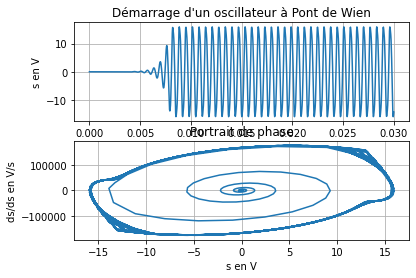

In [23]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#définissons F

def F(Y,t,Q,w0,K,Vsat):
    if abs(Y[0])<Vsat:
        d2y=-w0**2*Y[0]-w0/Q*(1-K/3)*Y[1]
    else :
        d2y=-w0**2*Y[0]-w0/Q*Y[1]
    return Y[1],d2y

#posons les constantes

Q=1/3
R=1e3
C=1e-7
w0=1/(R*C)
Vsat=13

K=3.3

#résolvons

t=np.linspace(0,30e-3,1000)
Y0=[0.0001,0.0001]

Y=odeint(F,Y0,t,args=(Q,w0,K,Vsat))

#traçons

plt.figure()
plt.subplot(211)
plt.plot(t,Y[:,0])
plt.grid()
plt.xlabel("Temps en s")
plt.ylabel ("s en V")
plt.title("Démarrage d'un oscillateur à Pont de Wien")

plt.subplot(212)
plt.plot(Y[:,0],Y[:,1])
plt.grid()
plt.xlabel("s en V")
plt.ylabel("ds/ds en V/s")
plt.title("Portrait de phase")
plt.show()
